In [69]:
import csv
import sqlite3
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [70]:
conn = sqlite3.connect(r'Student Loan Project')
cursor = conn.cursor()
print("Opened database successfully")

Opened database successfully


In [71]:
AllData = pd.read_csv(r'C:\Users\nmaxb\Student\Student Loan Project\Most-Recent-Cohorts-All-Data-Elements (version 1).csv')

In [72]:
#test
print(AllData[0:3])

   UNITID                               INSTNM STABBR  REGION     UGDS  \
0  100654             Alabama A & M University     AL       5   4824.0   
1  100663  University of Alabama at Birmingham     AL       5  12866.0   
2  100690                   Amridge University     AL       5    322.0   

   PCTFLOAN   CDR3  DEBT_MDN  
0    0.7697  0.198   13246.0  
1    0.5207  0.059   14979.5  
2    0.8741  0.128   10430.0  


In [73]:
AllData.dtypes

UNITID        int64
INSTNM       object
STABBR       object
REGION        int64
UGDS        float64
PCTFLOAN    float64
CDR3        float64
DEBT_MDN    float64
dtype: object

In [74]:
conn.commit()

In [75]:
# round columns to three decimal points
AllData.round({"PCTFLOAN":3, "CDR3":3})

,UNITID,INSTNM,STABBR,REGION,UGDS,PCTFLOAN,CDR3,DEBT_MDN
0,100654,Alabama A & M University,AL,5,4824.0,0.770,0.198,13246.0
1,100663,University of Alabama at Birmingham,AL,5,12866.0,0.521,0.059,14979.5
2,100690,Amridge University,AL,5,322.0,0.874,0.128,10430.0
3,100706,University of Alabama in Huntsville,AL,5,6917.0,0.428,0.074,13522.0
4,100724,Alabama State University,AL,5,4189.0,0.769,0.211,15738.0
5,100751,The University of Alabama,AL,5,32387.0,0.388,0.052,17340.0
6,100760,Central Alabama Community College,AL,5,1404.0,0.277,0.226,5764.0
7,100812,Athens State University,AL,5,2801.0,0.661,0.071,13461.0
8,100830,Auburn University at Montgomery,AL,5,4211.0,0.577,0.115,10750.0
9,100858,Auburn University,AL,5,23391.0,0.320,0.030,17000.0


In [76]:
AllData.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'REGION', 'UGDS', 'PCTFLOAN', 'CDR3',
       'DEBT_MDN'],
      dtype='object')

In [77]:
# Rename some columns
AllData.columns = ['UNITID', 'NAME', 'STATE', 'REGION', 'UNDERGRADS', 'PCTFLOAN', 'RPYMT_RATE_YR3', 'AVG_LOAN_DEBT']

In [78]:
conn.commit()

In [79]:
# To ensure columns were changed
AllData.head()

,UNITID,NAME,STATE,REGION,UNDERGRADS,PCTFLOAN,RPYMT_RATE_YR3,AVG_LOAN_DEBT
0,100654,Alabama A & M University,AL,5,4824.0,0.7697,0.198,13246.0
1,100663,University of Alabama at Birmingham,AL,5,12866.0,0.5207,0.059,14979.5
2,100690,Amridge University,AL,5,322.0,0.8741,0.128,10430.0
3,100706,University of Alabama in Huntsville,AL,5,6917.0,0.4278,0.074,13522.0
4,100724,Alabama State University,AL,5,4189.0,0.7690,0.211,15738.0


In [80]:
conn.commit()

In [81]:
AllData.to_sql('educaters', conn, if_exists = "replace")

## Regions divided by US states and territories
- Region 1 = CT, MA, ME, NH, RI, VT
- Region 2 = DC, DE, MD, NJ, NY, PA
- Region 3 = IL, IN, MI, OH, WI 
- Region 4 = IA, KS, MN, MO, ND, NE, SD 
- Region 5 = AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV
- Region 6 = AZ, NM, OK, TX
- Region 7 = CO, ID, MT, UT, WY
- Region 8 = AK, CA, HI, NV, OR, WA
- Region 9 = AS, FM, GU, MH, MP, PR, PW, VI (Territories)

### Number of Cohorts per Region

In [82]:
# Identify number of cohorts per region
def my_regct(AllData):
    for x in AllData:
       print(x) 
        
results = pd.Series(AllData.groupby(['REGION'])['UNITID'].count())

my_regct(results)


389
1121
1042
583
1778
740
267
991
147


### As noted below, Region 5 has the largest cohorts per region.  Will their mean of federal loans issued be the largest?

Text(0, 0.5, 'Cohorts per Region')

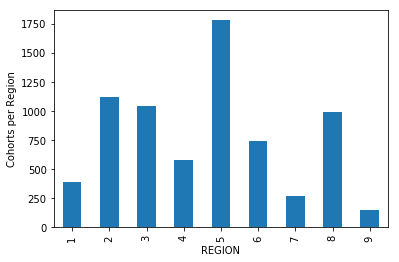

In [83]:
results.plot('bar')
plt.ylabel('Cohorts per Region')

### The Mean of Federal Loans Issued Per Region

In [84]:
# The mean of federal loans issued per region
def my_pctloan(AllData):
    for x in AllData:
       print(x) 
AllData.groupby(['REGION'])['PCTFLOAN'].mean().round(3)    
pctresults = pd.Series(data=AllData.groupby(['REGION'])['PCTFLOAN'].mean().round(3))

my_pctloan(pctresults)


0.537
0.528
0.543
0.529
0.481
0.445
0.458
0.419
0.141


### From the chart below, Region 3 has the highest mean of federal loans issued at 0.543, instead of Region 5 (with the largest number of cohorts) at 0.481.

Text(0.5, 0, 'Median of federal loans issued in each region')

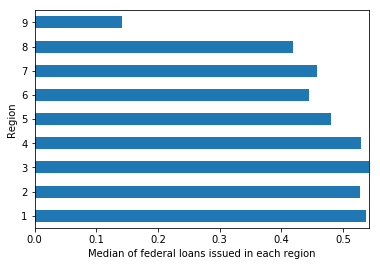

In [85]:
# Average percentage of Federal loans issued
pctresults.plot('barh')

plt.autoscale(True, 'x', True)

plt.ylabel('Region')
plt.xlabel('Median of federal loans issued in each region')


In [86]:
# What region has the highest average student loan default rate? The three year default rate is used.
default_rate = pd.read_sql_query('''
    SELECT REGION, AVG(RPYMT_RATE_YR3)
    FROM educaters
    GROUP BY REGION
    ORDER BY REGION ASC, AVG(RPYMT_RATE_YR3) DESC;
    ''', conn)

print(default_rate)
conn.commit()


   REGION  AVG(RPYMT_RATE_YR3)
0       1             0.089253
1       2             0.096621
2       3             0.112645
3       4             0.100420
4       5             0.123372
5       6             0.137046
6       7             0.114050
7       8             0.107760
8       9             0.126451


From the information above, we have determined that the region with the highest average student loan default is region 6.

### Conclusion:
Region 5 has the largest number of cohorts, Region 3 has 

Text(0.5, 0, 'Median of federal loans issued in each region')

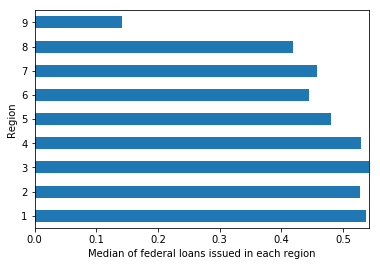

In [87]:
pctresults.plot('barh')

plt.autoscale(True, 'x', True)

plt.ylabel('Region')
plt.xlabel('Median of federal loans issued in each region')

Conclusion: Region 5 has the largest cohorts, region 3 has the highest mean of federal loans in the region